# Median Filter

Applies a median filter to an image. The median filter is defined as the median of all pixels within a local region of an image.

The median filter is normally used to reduce salt and pepper noise in an image, somewhat like the mean filter. However, it often does a better job than the mean filter of preserving useful detail in the image.

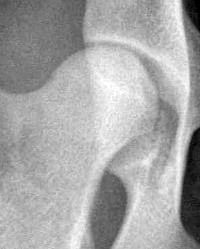

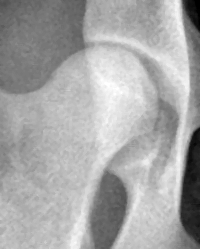

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def medianFilter(image, kernel_size):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median filter to the grayscale image
    filtered_image = cv2.medianBlur(gray_image, kernel_size)

    return filtered_image

# Example usage
image_file = "/content/a1.jpg"  # Replace with your input image file
kernel_size = 3  # Adjust the kernel size as needed

# Read the input image
image = cv2.imread(image_file)

if image is not None:
    # Apply the median filter
    filtered_image = medianFilter(image, kernel_size)

    # Display the original and filtered images
# Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image.")


# Arithmetic Mean Filter

Applies a arithmetic mean filter to an image.

An arithmetic mean filter operation on an image removes short tailed noise such as uniform and Gaussian type noise from the image at the cost of blurring the image. The arithmetic mean filter is defined as the average of all pixels within a local region of an image.

Pixels that are included in the averaging operation are specified by a mask. The larger the filtering mask becomes the more predominant the blurring becomes and less high spatial frequency detail that remains in the image.

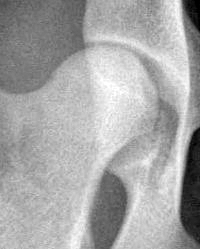

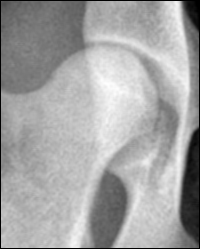

In [ ]:
import cv2
import numpy as np

def arithmetic_mean_filter(image, mask_size):
    # Convert the image to float for accurate calculations
    image = image.astype(np.float32)

    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the mask size
    padding = mask_size // 2

    # Apply the arithmetic mean filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the mask
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the average value of the region
            average = np.mean(region)

            # Assign the average value to the corresponding pixel in the filtered image
            filtered_image[i, j] = average

    return filtered_image


# Example usage
image_file = "/content/a1.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    filtered_image = arithmetic_mean_filter(image, mask_size=3)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)


# Geometric Mean Filter

Applies a geometric mean filter to an image.

In the geometric mean method, the color value of each pixel is replaced with the geometric mean of color values of the pixels in a surrounding region.

The geometric mean filter is better at removing Gaussian type noise and preserving edge features than the arithmetic mean filter. The geometric mean filter is very susceptible to negative outliers.

The geometric mean filter is better at removing Gaussian type noise and preserving edge features than the arithmetic mean filter. The geometric mean filter is very susceptible to negative outliers.

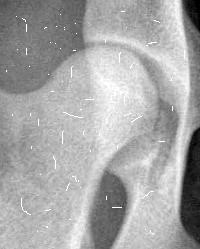

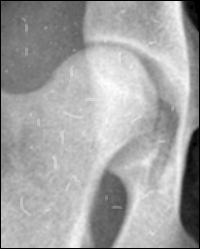

In [ ]:
import cv2
import numpy as np
from scipy.stats import gmean

def geometric_mean_filter(image, mask_size):
    # Convert the image to float for accurate calculations
    image = image.astype(np.float32)

    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the mask size
    padding = mask_size // 2

    # Apply the geometric mean filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the mask
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the geometric mean of the region
            geometric_mean = gmean(region.flatten())

            # Assign the geometric mean value to the corresponding pixel in the filtered image
            filtered_image[i, j] = geometric_mean

    return filtered_image


# Example usage
image_file = "/content/a2.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    filtered_image = geometric_mean_filter(image, mask_size=3)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)


# Harmonic Mean Filter

Applies a harmonic mean filter to an image.

In the harmonic mean method, the color value of each pixel is replaced with the harmonic mean of color values of the pixels in a surrounding region.
The harmonic mean filter is better at removing Gaussian type noise and preserving edge features than the arithmetic mean filter. The harmonic mean filter is very good at removing positive outliers.

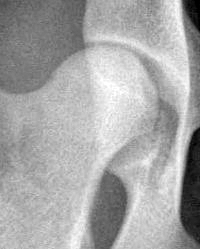

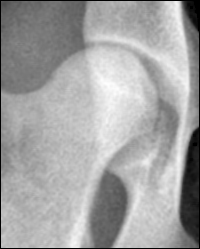

In [ ]:
import cv2
import numpy as np
from scipy.stats import hmean

def harmonic_mean_filter(image, mask_size):
    # Convert the image to float for accurate calculations
    image = image.astype(np.float32)

    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the mask size
    padding = mask_size // 2

    # Apply the harmonic mean filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the mask
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the harmonic mean of the region
            harmonic_mean = hmean(region.flatten())

            # Assign the harmonic mean value to the corresponding pixel in the filtered image
            filtered_image[i, j] = harmonic_mean

    return filtered_image


# Example usage
image_file = "/content/a1.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    filtered_image = harmonic_mean_filter(image, mask_size=3)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)



# Contraharmonic Mean Filter

Applies a contraharmonic mean filter to an image.

With a contraharmonic mean filter, the color value of each pixel is replaced with the contraharmonic mean of color values of the pixels in a surrounding region.

A contraharmonic mean filter reduces or virtually eliminates the effects of salt-and-pepper noise. For positive values of Q, the filter eliminates pepper noise. For negative values of Q it eliminates salt noise. It cannot do both simultaneously.

Note that the contraharmonic filter is simply the arithmetic mean filter if Q = 0, and the harmonic mean filter if Q = −1.

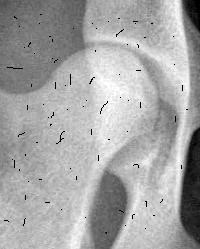

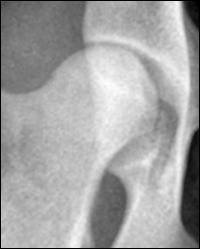

In [ ]:
import cv2
import numpy as np

def contraharmonic_mean_filter(image, mask_size, q):
    # Convert the image to float for accurate calculations
    image = image.astype(np.float32)

    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the mask size
    padding = mask_size // 2

    # Apply the contraharmonic mean filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the mask
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the numerator and denominator for the contraharmonic mean
            numerator = np.sum(region ** (q + 1))
            denominator = np.sum(region ** q)

            # Avoid division by zero
            if denominator != 0:
                # Calculate the contraharmonic mean
                contraharmonic_mean = numerator / denominator

                # Assign the contraharmonic mean value to the corresponding pixel in the filtered image
                filtered_image[i, j] = contraharmonic_mean

    return filtered_image


# Example usage
image_file = "/content/a3.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    mask_size = 3
    q = 1.5

    filtered_image = contraharmonic_mean_filter(image, mask_size, q)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)


# Maximum Filter

Applies a maximum filter to an image. The maximum filter is defined as the maximum of all pixels within a local region of an image.

The maximum filter is typically applied to an image to remove negative outlier noise.

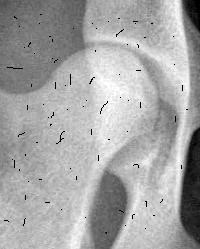

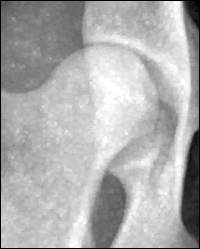

In [ ]:
import cv2
import numpy as np

def maximum_filter(image, mask_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the mask size
    padding = mask_size // 2

    # Apply the maximum filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the mask
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the maximum value within the local region
            maximum_value = np.max(region)

            # Assign the maximum value to the corresponding pixel in the filtered image
            filtered_image[i, j] = maximum_value

    return filtered_image


# Example usage
image_file = "/content/a3.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    mask_size = 3

    filtered_image = maximum_filter(image, mask_size)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)


# Minimum Filter

Applies a minimum filter to an image. The minimum filter is defined as the minimum of all pixels within a local region of an image.

The minimum filter is typically applied to an image to remove positive outlier noise.

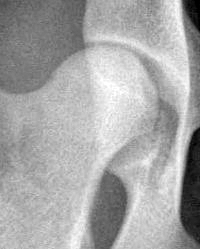

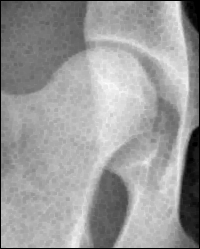

In [ ]:
import cv2
import numpy as np

def minimum_filter(image, mask_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the mask size
    padding = mask_size // 2

    # Apply the minimum filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the mask
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the minimum value within the local region
            minimum_value = np.min(region)

            # Assign the minimum value to the corresponding pixel in the filtered image
            filtered_image[i, j] = minimum_value

    return filtered_image


# Example usage
image_file = "/content/a1.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    mask_size = 3

    filtered_image = minimum_filter(image, mask_size)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)



# Midpoint Filter

Applies a midpoint filter to an image.

In the midpoint method, the color value of each pixel is replaced with the average of maximum and minimum (i.e. the midpoint) of color values of the pixels in a surrounding region. A larger region (filter size) yields a stronger effect.

The midpoint filter is typically used to filter images containing short tailed noise such as Gaussian and uniform type noise.

<ipython-input-14-211d867ea17b>:21: RuntimeWarning: overflow encountered in ubyte_scalars
  midpoint_value = (np.max(region) + np.min(region)) // 2


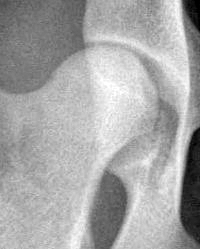

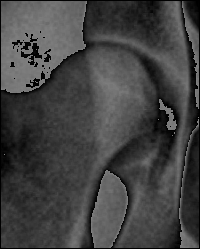

In [ ]:
import cv2
import numpy as np

def midpoint_filter(image, filter_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the filter size
    padding = filter_size // 2

    # Apply the midpoint filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the filter size
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the midpoint value within the local region
            midpoint_value = (np.max(region) + np.min(region)) // 2

            # Assign the midpoint value to the corresponding pixel in the filtered image
            filtered_image[i, j] = midpoint_value

    return filtered_image


# Example usage
image_file = "/content/a1.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    filter_size = 3

    filtered_image = midpoint_filter(image, filter_size)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)



# Yp Mean Filter

Applies a Yp Mean filter to an image.

The Yp mean filter is member of a set of nonlinear mean filters which are better removing Gaussian type noise and preserving edge features than the arithmetic mean filter. Yp mean filter is very good at removing positive outliers for negative values of P and negative outliers for positive values of P (Power)


<ipython-input-19-95c389a16201>:24: RuntimeWarning: divide by zero encountered in reciprocal
  yp_mean_value = np.mean(np.abs(region) ** p)


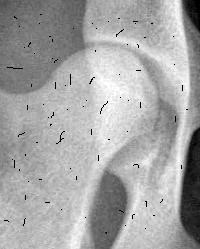

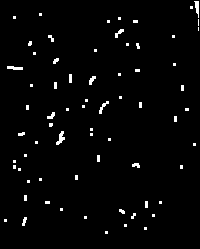

In [ ]:
import cv2
import numpy as np

def yp_mean_filter(image, filter_size, p):
    # Convert the image to float for accurate calculations
    image = image.astype(np.float32)

    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the filter size
    padding = filter_size // 2

    # Apply the Yp Mean filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the filter size
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the Yp Mean value within the local region
            yp_mean_value = np.mean(np.abs(region) ** p)

            # Assign the Yp Mean value to the corresponding pixel in the filtered image
            filtered_image[i, j] = yp_mean_value

    return filtered_image


# Example usage
image_file = "/content/a3.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    filter_size = 3
    p = -1.0  # Power value for the Yp Mean filter

    filtered_image = yp_mean_filter(image, filter_size, p)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)


# Range Filter

Applies a Range filter to an image.

In the range method, the color value of each pixel is replaced with the difference of maximum and minimum (i.e. the range) of color values of the pixels in a surrounding region.

The range filter is used to find edges within an image.

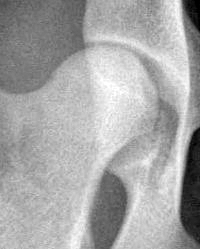

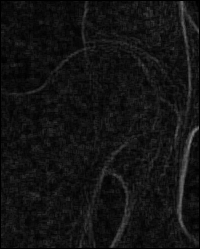

In [ ]:
import cv2
import numpy as np

def range_filter(image, filter_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Create an output image of the same size as the input image
    filtered_image = np.zeros_like(image)

    # Calculate the padding size based on the filter size
    padding = filter_size // 2

    # Apply the Range filter
    for i in range(padding, height - padding):
        for j in range(padding, width - padding):
            # Extract the local region defined by the filter size
            region = image[i - padding : i + padding + 1, j - padding : j + padding + 1]

            # Calculate the Range value within the local region
            range_value = np.max(region) - np.min(region)

            # Assign the Range value to the corresponding pixel in the filtered image
            filtered_image[i, j] = range_value

    return filtered_image


# Example usage
image_file = "/content/a1.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    filter_size = 3

    filtered_image = range_filter(image, filter_size)

    # Display the original and filtered images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)


# Emboss Filter

Generates an embossed image.

Image embossing is a computer graphics technique in which each pixel of an image is replaced either by a highlight or a shadow, depending on light/dark boundaries on the original image. Low contrast areas are replaced by a gray background.

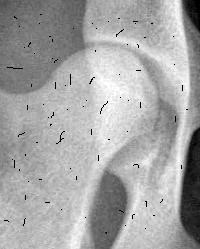

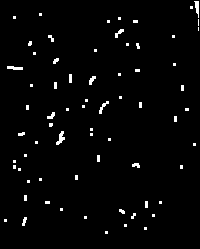

In [ ]:
import cv2
import numpy as np

def emboss_filter(image):
    # Define the emboss kernel
    kernel = np.array([[-2, -1, 0],
                       [-1, 1, 1],
                       [0, 1, 2]])

    # Apply the kernel to the image using the filter2D function
    embossed_image = cv2.filter2D(image, -1, kernel)

    # Normalize the pixel values to the range [0, 255]
    embossed_image = cv2.normalize(embossed_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return embossed_image


# Example usage
image_file = "/content/a3.jpg"
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is not None:
    embossed_image = emboss_filter(image)

    # Display the original and embossed images
    cv2_imshow(image)
    cv2_imshow(filtered_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image:", image_file)
